In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('airline-passengers.csv')
df.head()

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Convert Month into Datetime
df['month']=pd.to_datetime(df['month'])

In [4]:
df.set_index('month',inplace=True)
df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='month'>

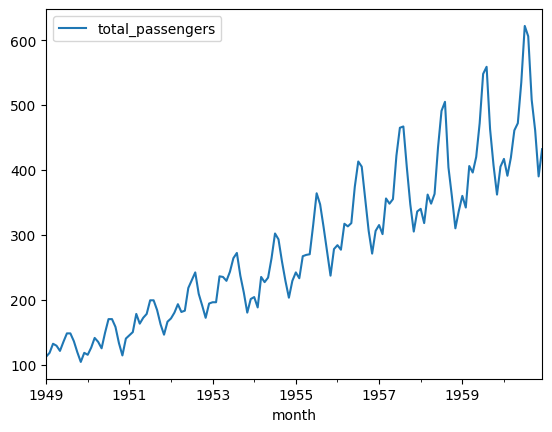

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['total_passengers'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['Statistik Uji ADF','p-value','#Lags yang Digunakan','Jumlah Observasi yang Digunakan']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("bukti yang kuat terhadap hipotesis nol (H0), tolak hipotesis nol. Data tidak memiliki akar unit dan stasioner")
    else:
        print("bukti lemah terhadap hipotesis nol, deret waktu memiliki akar unit, yang mengindikasikan bahwa deret waktu tersebut tidak stasioner ")

adfuller_test(df['total_passengers'])

Statistik Uji ADF : 0.8153688792060441
p-value : 0.9918802434376409
#Lags yang Digunakan : 13
Jumlah Observasi yang Digunakan : 130
bukti lemah terhadap hipotesis nol, deret waktu memiliki akar unit, yang mengindikasikan bahwa deret waktu tersebut tidak stasioner 


In [7]:
df['total_passengers d1'] = df['total_passengers'] - df['total_passengers'].shift(1)
df['total_passengers'].shift(1)

month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: total_passengers, Length: 144, dtype: float64

In [8]:
df['total_passengers d1']=df['total_passengers']-df['total_passengers'].shift(6)
df.head()

,total_passengers,total_passengers d1
month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN


In [9]:
## Again test dickey fuller test
adfuller_test(df['total_passengers d1'].dropna())

Statistik Uji ADF : -3.1544463942033096
p-value : 0.02277761479469231
#Lags yang Digunakan : 7
Jumlah Observasi yang Digunakan : 130
bukti yang kuat terhadap hipotesis nol (H0), tolak hipotesis nol. Data tidak memiliki akar unit dan stasioner


<Axes: xlabel='month'>

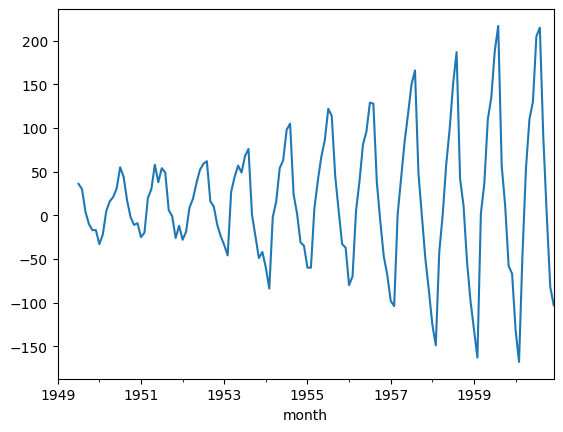

In [10]:
df['total_passengers d1'].plot()

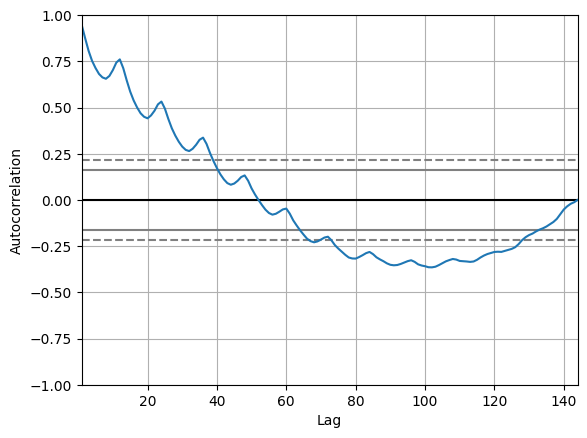

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['total_passengers'])
plt.show()

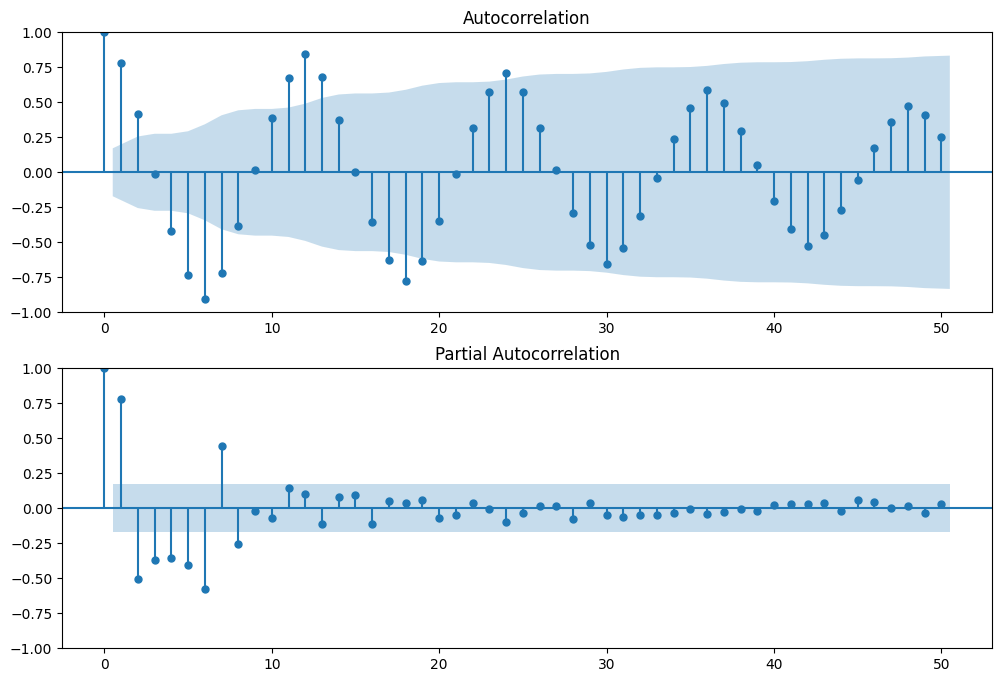

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
plot_acf(df['total_passengers d1'].iloc[13:], lags=50, ax=ax1)

ax2 = fig.add_subplot(212)
plot_pacf(df['total_passengers d1'].iloc[13:], lags=50, ax=ax2)

plt.show()

In [13]:
import itertools

d = [1]
q = range(0, 3)
p = range(0, 3)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []
'''for param in pdq:
    for param_seasonal in seasonal_pdq:
        print(f"Trying SARIMAX with params: {param}, seasonal params: {param_seasonal}")  # Debugging line
        mod = sm.tsa.statespace.SARIMAX(df['total_passengers'],
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()

        print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        AIC.append(results.aic)
        SARIMAX_model.append([param, param_seasonal])'''

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            print(f"Trying SARIMAX with params: {param}, seasonal params: {param_seasonal}")
            mod = sm.tsa.statespace.SARIMAX(df['total_passengers'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

Trying SARIMAX with params: (0, 1, 0), seasonal params: (0, 1, 0, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (0, 1, 1, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (0, 1, 2, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (1, 1, 0, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (1, 1, 1, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (1, 1, 2, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (2, 1, 0, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (2, 1, 1, 12)
Trying SARIMAX with params: (0, 1, 0), seasonal params: (2, 1, 2, 12)
Trying SARIMAX with params: (0, 1, 1), seasonal params: (0, 1, 0, 12)
Trying SARIMAX with params: (0, 1, 1), seasonal params: (0, 1, 1, 12)
Trying SARIMAX with params: (0, 1, 1), seasonal params: (0, 1, 2, 12)
Trying SARIMAX with params: (0, 1, 1), seasonal params: (1, 1, 0, 12)
Trying SARIMAX with params: (0, 1, 1), seasonal params: (1, 1, 1, 12)
Trying SARIMAX with 

In [15]:
print('AIC terkecil adalah {} untuk model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

AIC terkecil adalah 820.992177597042 untuk model SARIMAX(0, 1, 2)x(1, 1, 2, 12)


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model1 = ARIMA(df['total_passengers'], order=SARIMAX_model[AIC.index(min(AIC))][0])
model_fit1 = model1.fit()

# Print the summary of the model
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:       total_passengers   No. Observations:                  144
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -695.547
Date:                Sat, 10 Aug 2024   AIC                           1397.093
Time:                        15:45:49   BIC                           1405.982
Sample:                    01-01-1949   HQIC                          1400.705
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3822      0.072      5.283      0.000       0.240       0.524
ma.L2         -0.2633      0.062     -4.256      0.000      -0.384      -0.142
sigma2       979.2956    111.655      8.771      0.0

<Axes: xlabel='month'>

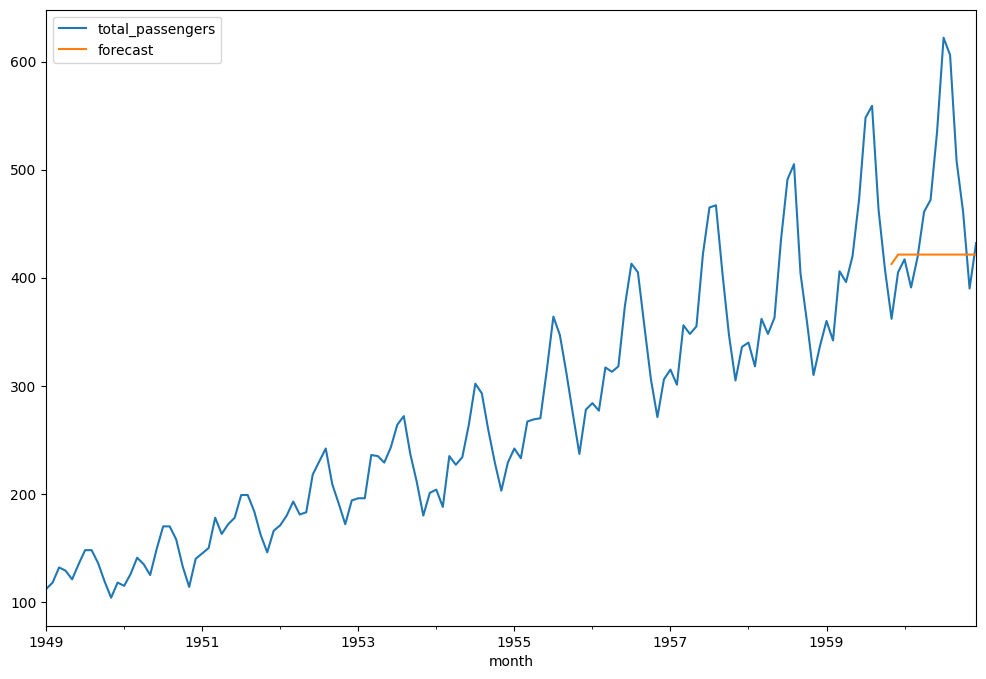

In [17]:
df['forecast']=model_fit1.predict(start=130,end=143,dynamic=True)
df[['total_passengers','forecast']].plot(figsize=(12,8))

In [18]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['total_passengers'],order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results=model.fit()

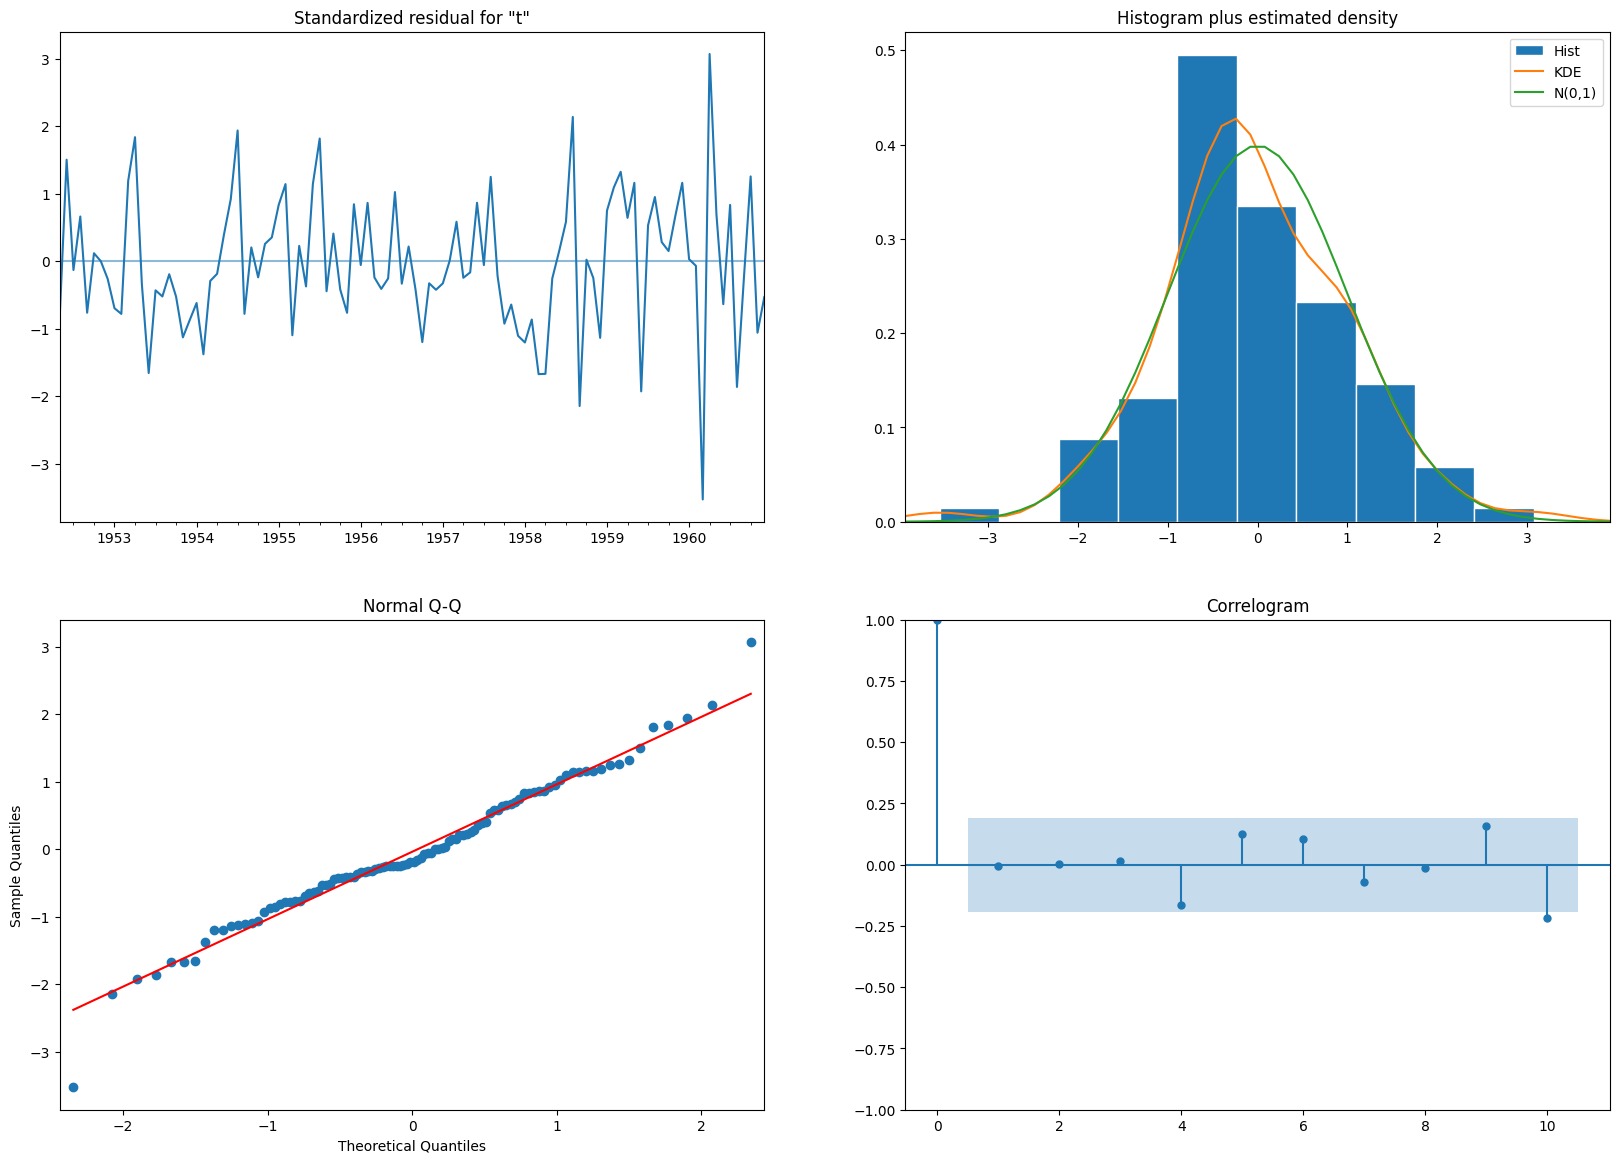

In [19]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

<Axes: xlabel='month'>

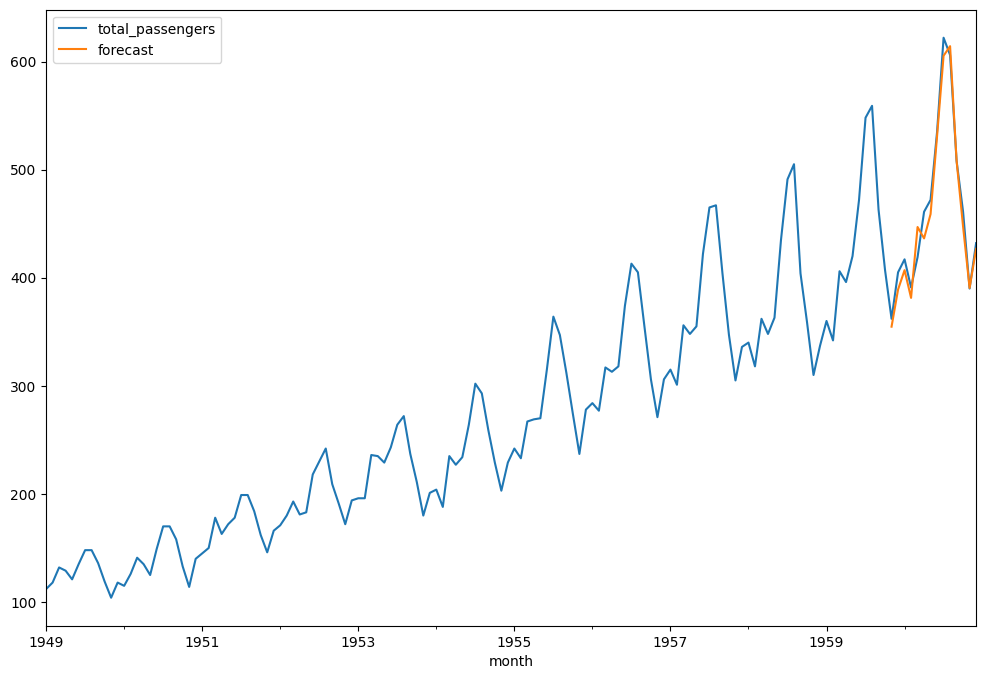

In [20]:
df['forecast']=results.predict(start=130,end=143,dynamic=True)
df[['total_passengers','forecast']].plot(figsize=(12,8))

In [21]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [22]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,total_passengers,total_passengers d1,forecast
1962-07-01,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN


In [23]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

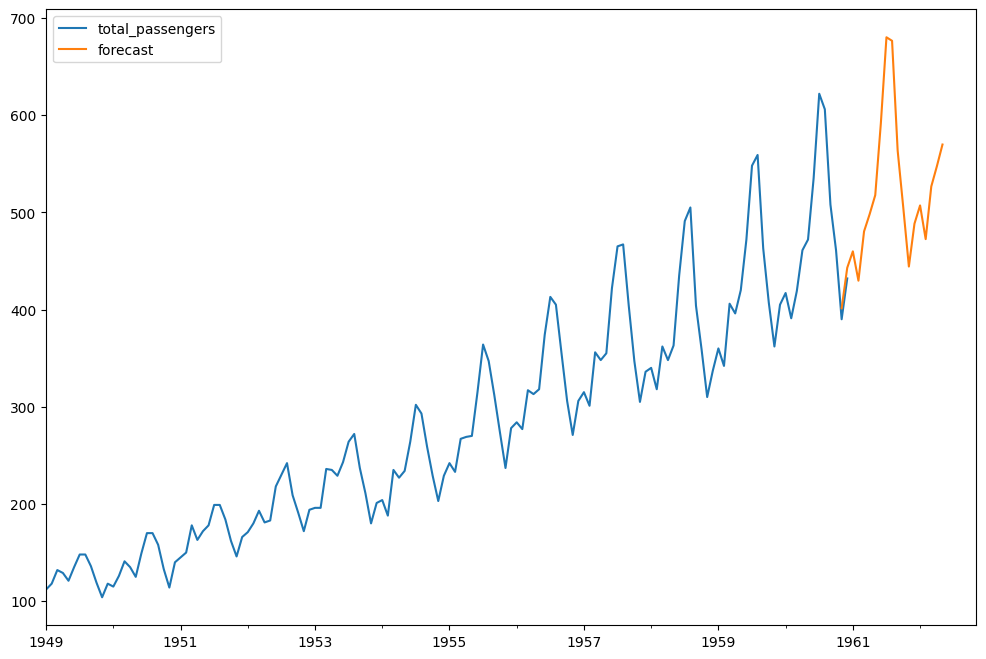

In [24]:
future_df['forecast'] = results.predict(start = 142, end = 160, dynamic= True)  
future_df[['total_passengers', 'forecast']].plot(figsize=(12, 8)) 